In [36]:
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import FancyArrowPatch
from shapely.geometry import LineString

# Ensure project root (where scripts live) is on the import path
PROJECT_ROOT_CANDIDATE = Path.cwd()
if not (PROJECT_ROOT_CANDIDATE / "sent_si.py").exists():
    PROJECT_ROOT_CANDIDATE = PROJECT_ROOT_CANDIDATE.parent
if str(PROJECT_ROOT_CANDIDATE) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT_CANDIDATE))

from sent_si import read_network_data
from spatial import *

plt.rcParams["figure.dpi"] = 120


In [ ]:
new_fn = "../params/hort365_NZ.csv"
ranked_data = pd.read_csv("sentinel_rank_table.csv")
prop_data = pd.read_csv("../params/2024_prop_dat.csv")
all_data = link_rank_prop_data(ranked_data,prop_data)
print(all_data[all_data["PROPERTY_ID"] == 9720])
rank_type = "R_I"
filter_type = 3
ranking_nums = {}
rf_list = list(all_data[rank_type])
for x in rf_list:
    if x not in ranking_nums:
        ranking_nums[x] = 1
    else:
        ranking_nums[x] += 1

subset_nodes = get_subset(new_fn,filter_type,all_data,rank_type)
print(subset_nodes["top_id"])

      PROPERTY_ID    dF_sum  dI_mean   dT_mean     R_F  R_I   R_T          h  \
1479         9720  0.999373  0.00175  0.341797  1480.0  1.0  20.0  16.782271   

      i_d  o_d  ...        harm  clust  GPS_CENTRE_LATITUDE  \
1479    1    2  ...  330.653677    0.0           176.063996   

      GPS_CENTRE_LONGITUDE  PROPERTY_AREA_HECTARES  \
1479            -37.586515               16.782271   

      PROPERTY_BLOCKAREA_PRODUCTIVE_HECTARES  PROPERTY_TYPES  REGION_ID  \
1479                                     NaN             200        2.0   

      COUNTRY  GEO_HASH  
1479       NZ    rcm4nm  

[1 rows x 27 columns]
{30486}


In [38]:
node_types = list(subset_nodes.keys())
latlong_class = pd.DataFrame()
node_rankings = pd.DataFrame()
class_nodes = pd.DataFrame()
rank_nodes = pd.DataFrame()
for n in node_types:
    matching_nodes = prop_data.loc[prop_data['PROPERTY_ID'].isin(subset_nodes[n])] 
    ranking_nodes = all_data.loc[all_data['PROPERTY_ID'].isin(subset_nodes[n])]
    matching_nodes["node_type"] = n
    ranking_nodes["node_type"] = n
    class_nodes = pd.concat([class_nodes,matching_nodes],ignore_index=True)
    rank_nodes = pd.concat([rank_nodes,ranking_nodes],ignore_index=True)
# latlong-class contaings
# some nodes that arent seeds 
# or good sentinels - however they may contribute to spreading?
latlong_class = class_nodes
node_rankings = rank_nodes


/tmp/ipykernel_610620/1924662860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_nodes["node_type"] = n
/tmp/ipykernel_610620/1924662860.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking_nodes["node_type"] = n
/tmp/ipykernel_610620/1924662860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [39]:
all_data.columns

Index(['PROPERTY_ID', 'dF_sum', 'dI_mean', 'dT_mean', 'R_F', 'R_I', 'R_T', 'h',
       'i_d', 'o_d', 'o_w', 'i_w', 'w', 'd', 'close', 'bc', 'ev', 'harm',
       'clust', 'GPS_CENTRE_LATITUDE', 'GPS_CENTRE_LONGITUDE',
       'PROPERTY_AREA_HECTARES', 'PROPERTY_BLOCKAREA_PRODUCTIVE_HECTARES',
       'PROPERTY_TYPES', 'REGION_ID', 'COUNTRY', 'GEO_HASH'],
      dtype='object')

In [40]:
arrow_colors = {"out_comp":"#2166ac",
                "in_neigh":"#b2182b",
                "out_neigh":"#67a9cf",
                "top_id":"black",
                "in_comp":"#ef8a62",
                "seeds":"#4d4d4d",
               "both_neigh": "orange"}
alpha_vals = {"out_comp":0.8,
                "in_neigh":1,
                "out_neigh":1,
                "top_id":1,
                "in_comp":0.8,
                "seeds":0.05,
                "both_neigh":1}
size_vals = {"out_comp":15,
                "in_neigh":35,
                "out_neigh":35,
                "top_id":45,
                "in_comp":35,
                "seeds":15,
                "both_neigh":35}
node_zorder = {"out_comp":4,
                "in_neigh":2,
                "out_neigh":3,
                "top_id":1,
                "in_comp":5,
                "seeds":4,
                "both_neigh":2}

top-id:  30486


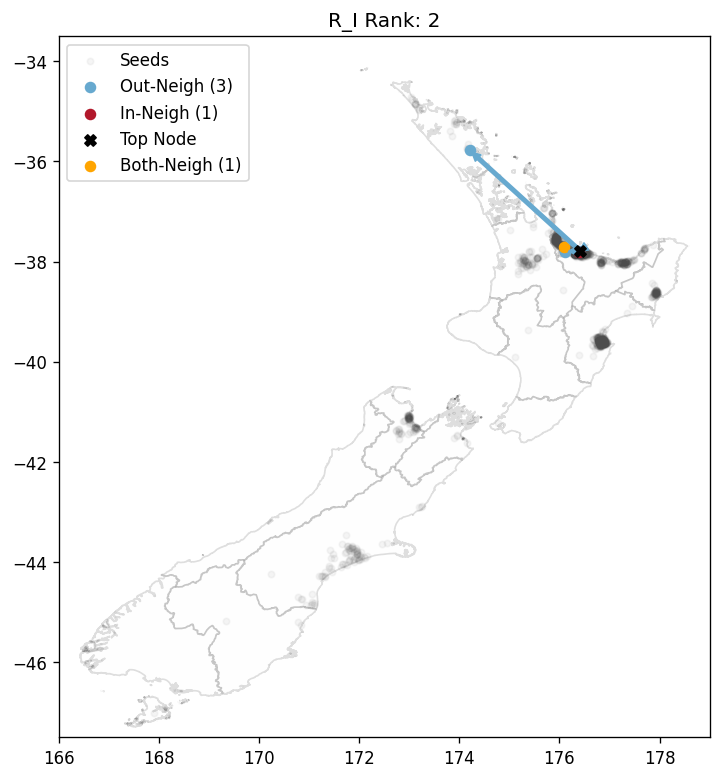

In [41]:
fp = "../params/regional-council-2025-clipped.shp"
latlong_class = latlong_class.rename(columns={"GPS_CENTRE_LONGITUDE":"long","GPS_CENTRE_LATITUDE":"lat"})
node_rankings = node_rankings.rename(columns={"GPS_CENTRE_LONGITUDE":"long","GPS_CENTRE_LATITUDE":"lat"})

plot_NZ_nodes_arrows(fp,rank_type,filter_type,node_rankings,latlong_class,subset_nodes,arrow_colors,alpha_vals,size_vals,node_zorder)
title = "NZ_"+str(rank_type)+"_"+str(filter_type)+".png"
title_string = rank_type + " Rank: " + str(filter_type)
plt.title(title_string)
plt.savefig("figs/"+title)